                          Adult Income Analysis and Modelling

The data used for this project was obtained from kaggle. Youu can download from this link https://www.kaggle.com/uciml/adult-census-income

Fisrt start by importing important libraries in jupyter IDE.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sb
import sklearn as sk
from sklearn import metrics
from sklearn import preprocessing as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


load data set and view first 3 rows 

In [2]:
data=pd.read_csv("G:\python bank\DATA\Income data.csv")
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


Write a function that removes (?) from data set

In [3]:
def remove_punctuations(df):
                            df['workclass'] = df['workclass'].apply(lambda x: np.nan if x == '?' else str(x))
                            df['occupation'] = df['occupation'].apply(lambda x: np.nan if x == '?' else str(x))
                            df['native-country'] = df['native-country'].apply(lambda x: np.nan if x == '?' else str(x))
                            return df
                            

I had a large data set, therefore I dropped rows with NaN. This was to avoid imputation 

In [4]:
df=remove_punctuations(data)
dat=df.dropna()

In [5]:
 dat.shape

(45222, 15)

In [6]:
 dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Text(0.5,1,'Education years and hours worked per week')

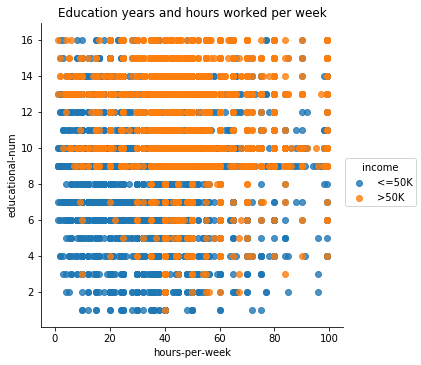

In [7]:
#education level and hours worked per week
sb.lmplot('hours-per-week','educational-num',data=dat, hue='income', fit_reg=False);
py.title('Education years and hours worked per week')

The linear plot from seaborn was used to check interaction between two features. Also, fixing line of best fit in the plot is possible.

I did plots for some features to understand their effet on income

Race Versus Income

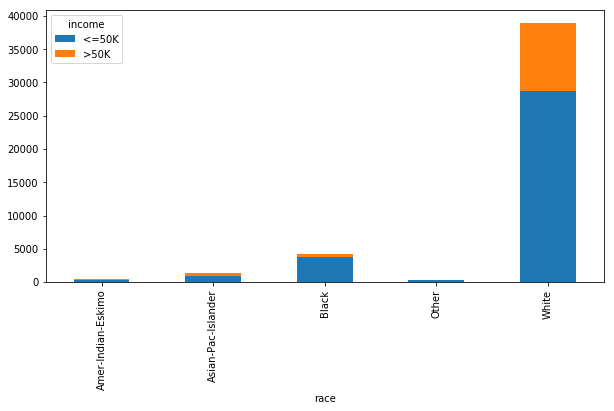

In [9]:
#Race versus Income
dat.groupby(["race", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

Marital status Versus Income

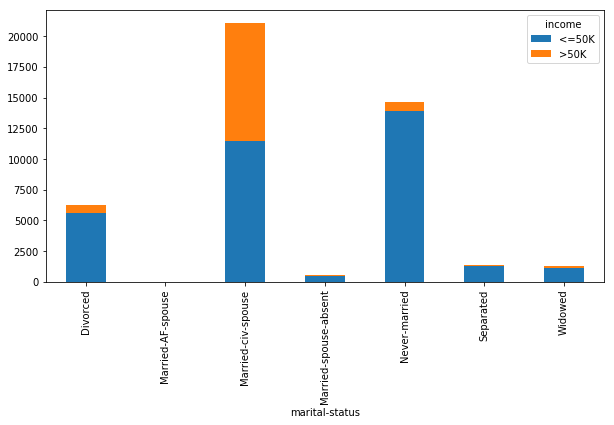

In [10]:
dat.groupby(["marital-status", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

Education versus Income

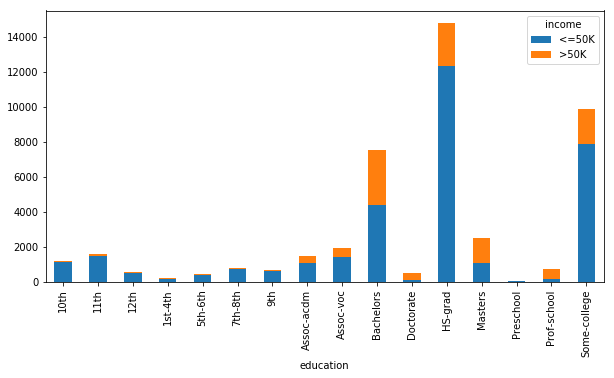

In [10]:
dat.groupby(["education", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

Relationship versus Income

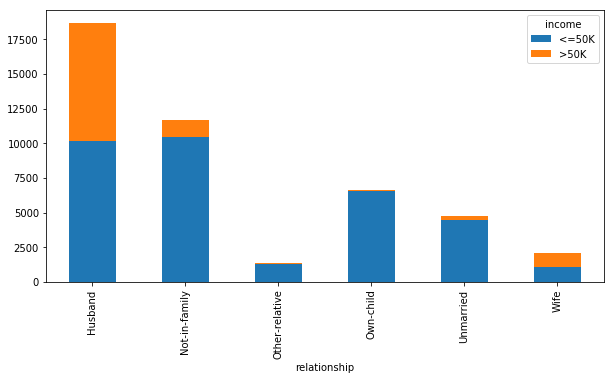

In [11]:
dat.groupby(["relationship", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

Occupation versus Income

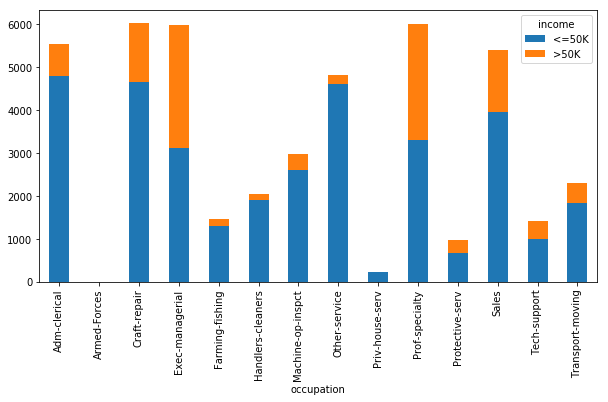

In [12]:
dat.groupby(["occupation", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

Gender versus Income

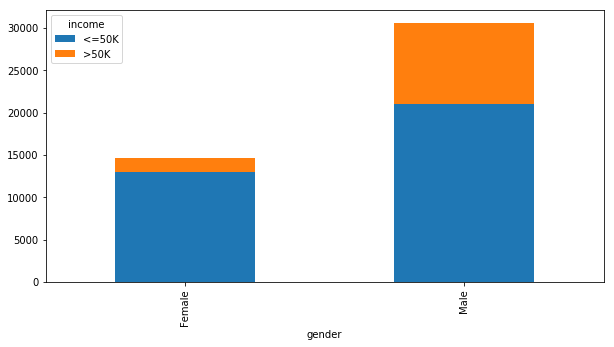

In [13]:
dat.groupby(["gender", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

Work-Class Versus Income

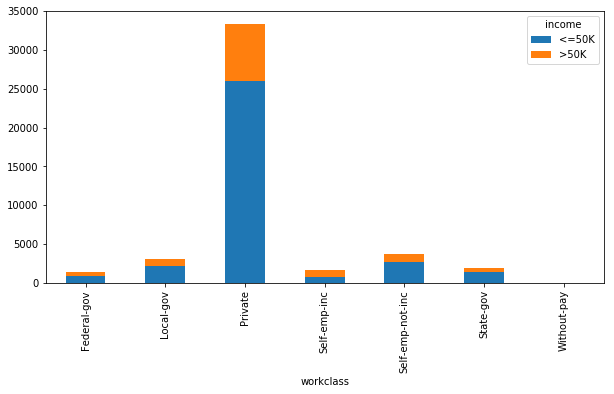

In [14]:
dat.groupby(["workclass", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

Number of education years Versus Income

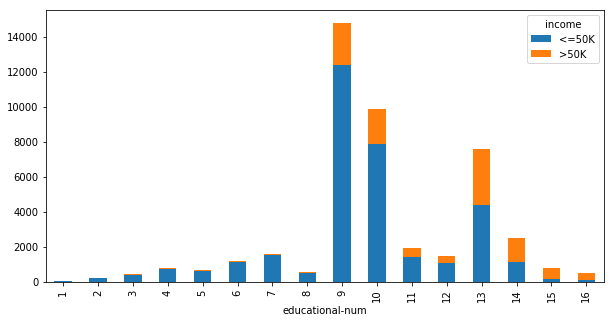

In [15]:
dat.groupby(["educational-num", "income"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

In [8]:
label = LabelEncoder()
cols = ['workclass', 'education','marital-status', 'occupation',
       'relationship', 'race', 'gender','income']
for col in cols:
    dat[col] = label.fit_transform(dat[col])

Text(0.5,1,'CORRELATION')

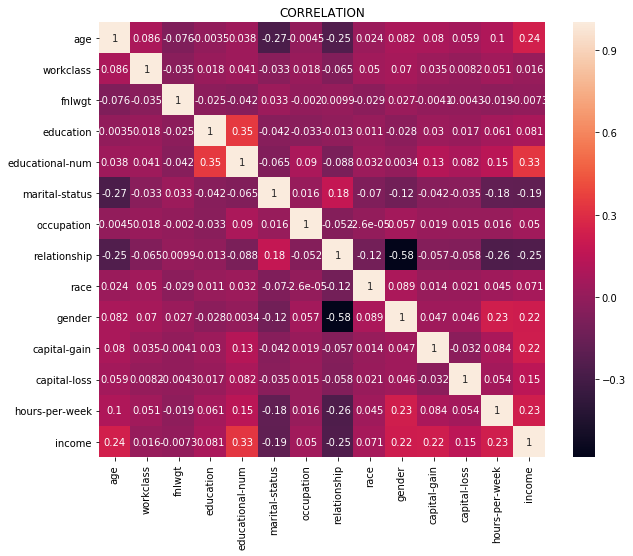

In [9]:
f, ax=py.subplots(figsize=(10,8))
sb.heatmap(dat.corr(), annot=True, ax=ax)
py.title('CORRELATION')

From the heat map:
    
There is strong correlation between education and number of educational years. One is derived from the other. Maybe number of years was calculated from the variable education. I dropped years of education for that matter. There is positive correlation between relationship and gender. Howevever there is a negative correlation between gender and relationship. Therefore I could not drop relationship.

In [10]:
scaler = pp.StandardScaler()
X=dat.drop(['income','native-country','educational-num'], axis=1)
X = scaler.fit_transform(X)
Y=dat['income']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [11]:
#confirm the shape of the features 
X.shape

(45222, 12)

Build three models and use RandomizedSearchCv to tune the models.
1. Grandient Boosting Classifier
2. Extreme Gradient Boosting Classifier 
3. Random Forest Classfier 

I used F1 score to select the best model. 

Realize I used startified sampling because the data was imbalanced. 

In [12]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
param_grid_GBS={"max_depth":[4,5,7,8],"n_estimators":[50,80,100,200,250,300],"learning_rate": [0.01, 0.02, 0.05,0.1]}

Gradient Boosting Classifier 

In [21]:
#hyper-paremeter for GB
GBestimator=GradientBoostingClassifier(random_state=42)
GB=RandomizedSearchCV(GBestimator,param_grid_GBS,cv=folds)
GB.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
          error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [4, 5, 7, 8], 'n_estimators': [50, 80, 100, 200, 250, 300], 'learning_rate': [0.01, 0.02, 0.05, 0.1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [22]:
print('Best score:\n',GB.best_score_)
print('Best Parameters:\n',GB.best_params_)

Best score:
 0.867382719949455
Best Parameters:
 {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}


Apply the best parameters in Gradient boosting model 

In [23]:
gbc =GradientBoostingClassifier(n_estimators= 100, max_depth= 7, learning_rate=0.1)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
print('F1 GBoost:\n',metrics.f1_score(y_test, y_pred))

F1 GBoost:
 0.7199364575059571


In [23]:
rf_model=RandomForestClassifier(n_estimators=400, max_depth=10, max_features='sqrt', min_samples_leaf=3, min_samples_split=5, bootstrap=False)
rf_model.fit(x_train, y_train)
y_pred=rf_model.predict(x_test)
print('F1 Random Forest:\n', metrics.f1_score(y_test, y_pred))

F1 Random Forest:
 0.6652864044168392


Extreme Gradient Boosting Classifier 

In [29]:
#hyper-paremeter 
XGBestimator=xgb.XGBClassifier(random_state=42)
XGB=RandomizedSearchCV(XGBestimator,param_grid_GBS,cv=folds)
XGB.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [4, 5, 7, 8], 'n_estimators': [50, 80, 100, 200, 250, 300], 'learning_rate': [0.01, 0.02, 0.05, 0.1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [30]:
print('Best score:\n',XGB.best_score_)
print('Best Parameters:\n',XGB.best_params_)

Best score:
 0.8679513504975517
Best Parameters:
 {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.1}


Best parameters in the model 

In [13]:
xgb1 = xgb.XGBClassifier(max_depth=7, n_estimators=250, learning_rate=0.1)
xgb1.fit(x_train, y_train)
y_pred = xgb1.predict(x_test)
print('F1 XGB score:\n', metrics.f1_score(y_test, y_pred))

F1 XGB score:
 0.7203671467004272


ExtremeGB gave the highest f1-score therefore I used it to predict the unseen data points (test data set). However, the 3 models had good precision-recal scores. This is a classification problem so I used confusion matrix to evaluate model performance. 

In [33]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[9524  668]
 [1099 2276]]
Classification report: 
              precision    recall  f1-score   support

          0       0.90      0.93      0.92     10192
          1       0.77      0.67      0.72      3375

avg / total       0.87      0.87      0.87     13567



There is awesome kernel on kaggle that explains how to interprete figures from the classification report. Check the article if you do not understand what these figures represent.

It is important to plot the precision curve for the model. It illustrates how the model learned the data and recalled. 

In [17]:
y_pred_prob = xgb1.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
metrics.auc(fpr, tpr)

0.9258589016803302

I did plot for the Receiver Operating Curve. 

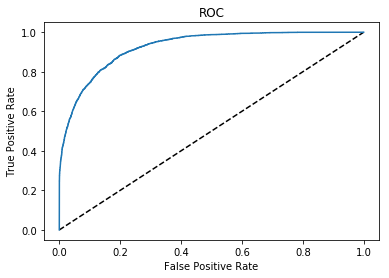

In [18]:
# Plot ROC curve
py.plot([0, 1], [0, 1], 'k--')
py.plot(fpr, tpr)
py.xlabel('False Positive Rate')
py.ylabel('True Positive Rate')
py.title('ROC')
py.show()

The area under the curve was so large: 92.59. Besides, from the Receiver Operating Curve I concluded the XGBoost classifier was optimal. I extracted important features from the model. In my next blog I will use XGBoost for feature selection.

In [19]:
#To get feature names. This is a repetation because I just needed to store of copy of X before transformation. 
dat1=dat.drop(['income','native-country','educational-num'], axis=1)

[0.17665026 0.05031393 0.2671814  0.08620397 0.03351434 0.09765824
 0.03622942 0.01654505 0.01069065 0.07042254 0.0533684  0.10122178]


Text(0.5,1,'Feature Importance')

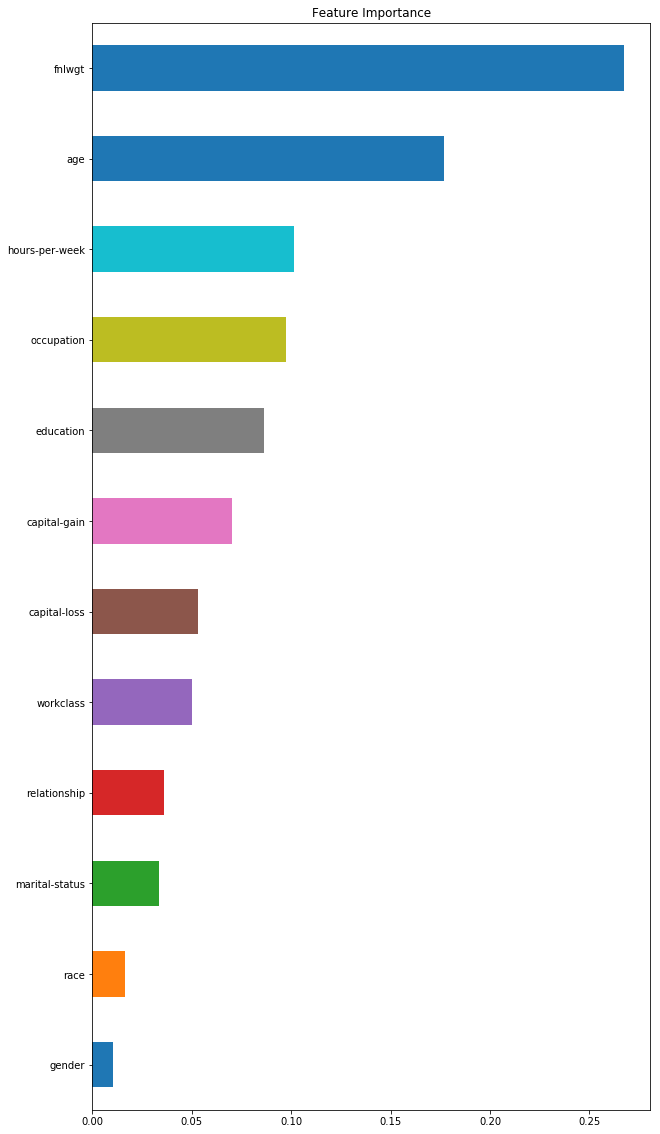

In [26]:
# Get Feature Importance from the classifier
feature_importance = xgb1.feature_importances_
print (xgb1.feature_importances_)
feat_importances = pd.Series(xgb1.feature_importances_ ,index=dat1.columns )
feat_importances = feat_importances.nsmallest(100)
feat_importances.plot(kind='barh' , figsize=(10,20))
py.title('Feature Importance')


Conclusion:

1.There is gender inequality in society. Men are more likely to earn >50k per year compared to women. 

2.Increase in educational years increased the chance of earning >50k per year.

3.The number of hours worked per week does not guarantee a salary >50k per year.

4.You cannot offer private house services and earn >50k per year, sorry. Maybe it's because people in this category do not invest hence no capital gains. I inspected the capital gains column to confirm.   

5.Only a small percent of those working for local government earned >50k per year.

6.More than half of those in private sector earned <=50k per year.

7.3/4 of those working for the federal government earn less than 50k per year, the remainder earned >50k.

8.You cannot study less than 3 years and earn >50k per year. The proportion earning >50k increased after 9 years of schooling. I think this goes hand in hand with work experience.  

These are just conclusions I made from EDA since I used a black-box model. A model like logistic regression would give more insights.